In [6]:
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [11]:
load_dotenv()
base_dir = os.getenv('BASE_DIR')
atlas_dir = os.path.join(base_dir, 'atlas')
cortical_atlas_path = os.path.join(atlas_dir, 'atlas_MBM_cortex_vH.nii.gz')
subcortical_atlas_path = os.path.join(atlas_dir, 'atlas_MBM_subcortical_beta.nii.gz')

In [2]:
def load_nifti_image(file_path):
    """
    Load a NIfTI image and return the data and affine matrix.
    
    Parameters:
    - file_path: Path to the NIfTI file.
    
    Returns:
    - data: 3D numpy array of the image data.
    - affine: Affine matrix of the NIfTI image.
    """
    img = nib.load(file_path)
    data = img.get_fdata()
    affine = img.affine
    return data, affine

In [3]:
def normalize_data(data):
    """
    Normalize the data to the range [0, 1].
    
    Parameters:
    - data: 3D numpy array of the data to be normalized.
    
    Returns:
    - normalized_data: 3D numpy array of normalized data.
    """
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data

In [4]:
def plot_atlas_with_labels(ax, atlas_data, slice_index, cmap='viridis', font_color='white', alpha=0.5):
    """
    Plots the atlas data with region labels on the corresponding areas.
    
    Parameters:
    - ax: Matplotlib axis object where the plot will be drawn.
    - atlas_data: 3D numpy array representing the atlas data.
    - slice_index: Index of the slice to be visualized.
    - cmap: Colormap for visualization.
    - font_color: Color of the labels.
    - alpha: Transparency level of the plot.
    
    Returns:
    - im: Image object for colorbar association.
    """
    # Plot the atlas data with a continuous colormap
    im = ax.imshow(np.rot90(atlas_data[slice_index, :, :]), cmap=cmap, alpha=alpha)

    # Get the unique labels in the slice and their positions
    unique_labels = np.unique(atlas_data[slice_index, :, :])

    # Loop through each unique label to place the label on the plot
    for label in unique_labels:
        if label == 0:
            continue
        # Find the coordinates of the label
        y, x = np.where(np.rot90(atlas_data[slice_index, :, :]) == label)
        
        # Place the label at the mean position of all points with the same value
        ax.text(np.mean(x), np.mean(y), str(int(label)), color=font_color,
                fontsize=8, ha='center', va='center')
    
    return im

In [18]:
def plot_combined_atlas(cortical_atlas_data, subcortical_atlas_data, brain_data, slice_index, title):
    """
    Plot the cortical and subcortical atlas data with overlaid chunk data in a single plot.
    
    Parameters:
    - cortical_atlas_data: 3D numpy array representing the cortical atlas data.
    - subcortical_atlas_data: 3D numpy array representing the subcortical atlas data.
    - chunk_data: 3D numpy array representing the chunk data.
    - slice_index: Index of the slice to be visualized.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot cortical atlas
    plot_atlas_with_labels(ax, cortical_atlas_data, slice_index, cmap='viridis', font_color='white', alpha=0.5)

    # Overlay subcortical atlas on the same plot
    plot_atlas_with_labels(ax, subcortical_atlas_data, slice_index, cmap='plasma', font_color='black', alpha=0.5)

    # Overlay normalized chunk data
    im = ax.imshow(np.rot90(brain_data[slice_index, :, :]), cmap='bwr', vmin=-15, vmax=15, alpha=0.7)

    # Add a colorbar
    plt.colorbar(im, ax=ax)
    plt.title(f"{title} - Cortical and Subcortical Regions")
    plt.show()

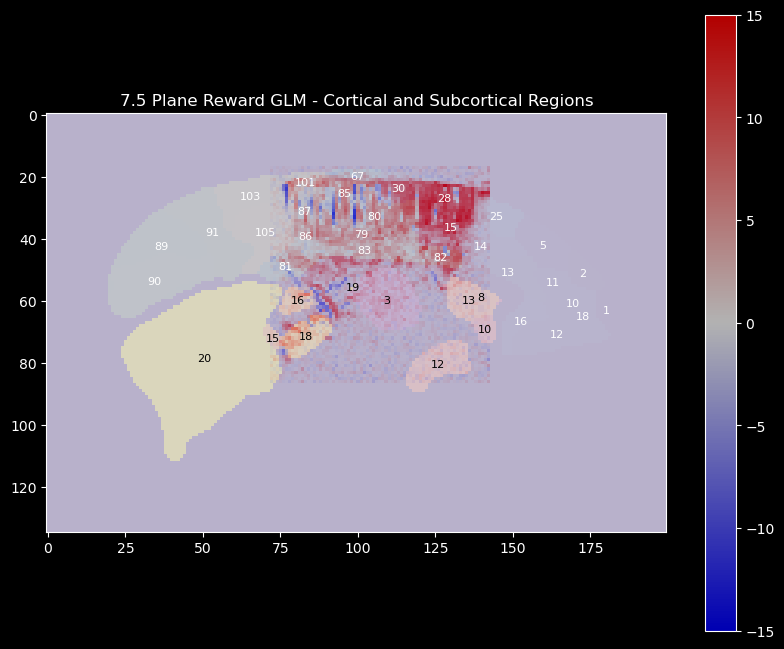

In [19]:
reward_75_file_path = os.path.join(base_dir, 'output', 'Grouper_audiocue_053124_corrected3_glm_reward_aligned.nii.gz')

# Load the NIfTI images
cortical_atlas_data, cortical_atlas_affine = load_nifti_image(cortical_atlas_path)
subcortical_atlas_data, subcortical_atlas_affine = load_nifti_image(subcortical_atlas_path)
brain_data, brain_affine = load_nifti_image(reward_75_file_path)

# Normalize the chunk data
# normalized_chunk = normalize_data(chunk_data)

# Example slice index for visualization
slice_index = 78  # Adjust this index to view other slices
title = '7.5 Plane Reward GLM'
# Plot the combined atlases and chunk data
plot_combined_atlas(cortical_atlas_data, subcortical_atlas_data, brain_data, slice_index, title)


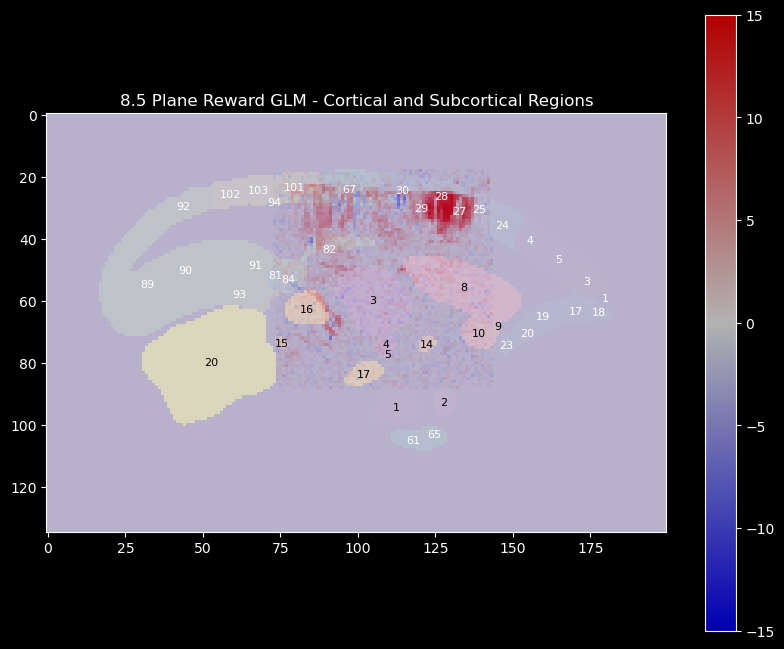

In [23]:
brain_file_path = os.path.join(base_dir, 'output', 'Grouper_audiocue_060324_corrected3_glm_reward_aligned.nii.gz')

cortical_atlas_data, cortical_atlas_affine = load_nifti_image(cortical_atlas_path)
subcortical_atlas_data, subcortical_atlas_affine = load_nifti_image(subcortical_atlas_path)
brain_data, brain_affine = load_nifti_image(brain_file_path)


slice_index = 87
title = '8.5 Plane Reward GLM'
plot_combined_atlas(cortical_atlas_data, subcortical_atlas_data, brain_data, slice_index, title)